In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
# load dataset
data = pd.read_csv("LungCap.csv")

In [9]:
# view data structure and summary
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB
None
          LungCap         Age      Height
count  725.000000  725.000000  725.000000
mean     7.863148   12.326897   64.836276
std      2.662008    4.004750    7.202144
min      0.507000    3.000000   45.300000
25%      6.150000    9.000000   59.900000
50%      8.000000   13.000000   65.400000
75%      9.800000   15.000000   70.300000
max     14.675000   19.000000   81.800000


In [11]:
# normalization
# nor <- function(x) { (x -min(x))/(max(x) - min(x))}
scaler = MinMaxScaler()
data[['Age', 'Height', 'LungCap']] = scaler.fit_transform(data[['Age', 'Height', 'LungCap']])
print("\nAfter Normalization:")
print(data[['Age', 'Height', 'LungCap']].describe())



After Normalization:
              Age      Height     LungCap
count  725.000000  725.000000  725.000000
mean     0.582931    0.535240    0.519209
std      0.250297    0.197319    0.187889
min      0.000000    0.000000    0.000000
25%      0.375000    0.400000    0.398292
50%      0.625000    0.550685    0.528868
75%      0.750000    0.684932    0.655915
max      1.000000    1.000000    1.000000


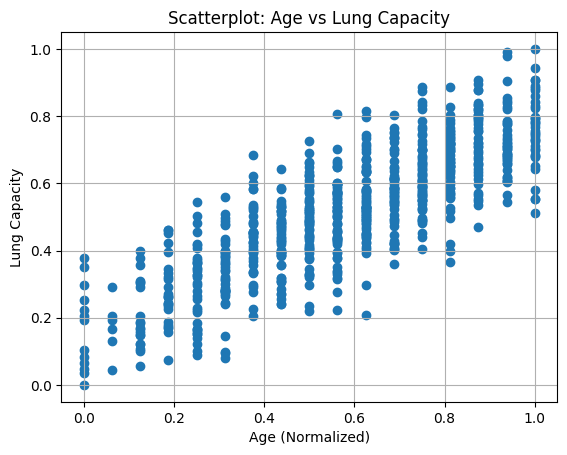

In [15]:
# scatter plot
plt.scatter(data['Age'], data['LungCap'])
plt.xlabel('Age (Normalized)')
plt.ylabel("Lung Capacity")
plt.title("Scatterplot: Age vs Lung Capacity")
plt.grid(True)
plt.show()

--- 
### Linear Regression Model

In [16]:
x = data[['Age']]
y = data[['LungCap']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


--- 
### Predict

In [17]:
checklungs = pd.DataFrame({'Age': [25]})
result = model.predict(checklungs)
print("Predicted Lung Capacity for Age 25:",result)

Predicted Lung Capacity for Age 25: [[15.4828156]]


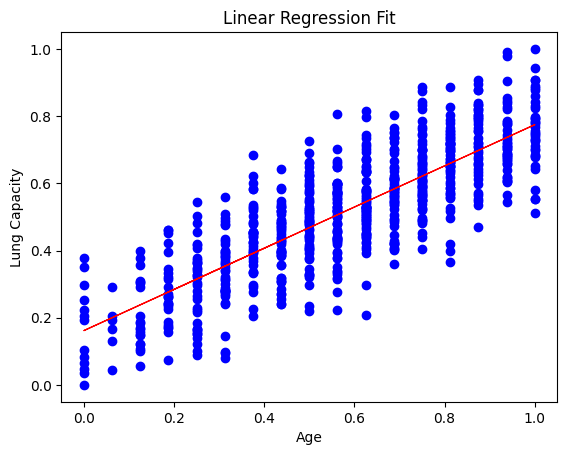

In [32]:
# plot regression line
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x), color='red', linewidth=0.9)
plt.xlabel("Age")
plt.ylabel("Lung Capacity")
plt.title("Linear Regression Fit")
plt.show()

--- 
### Mean Squared Error
    Measeures average squared difference between actual and predictive values

In [35]:
y_perd = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

NameError: name 'y_pred' is not defined